In [12]:
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv("weather.csv", parse_dates=["date"])
weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


array([[<AxesSubplot: title={'center': 'date'}>,
        <AxesSubplot: title={'center': 'precipitation'}>],
       [<AxesSubplot: title={'center': 'temp_max'}>,
        <AxesSubplot: title={'center': 'temp_min'}>],
       [<AxesSubplot: title={'center': 'wind'}>, <AxesSubplot: >]],
      dtype=object)

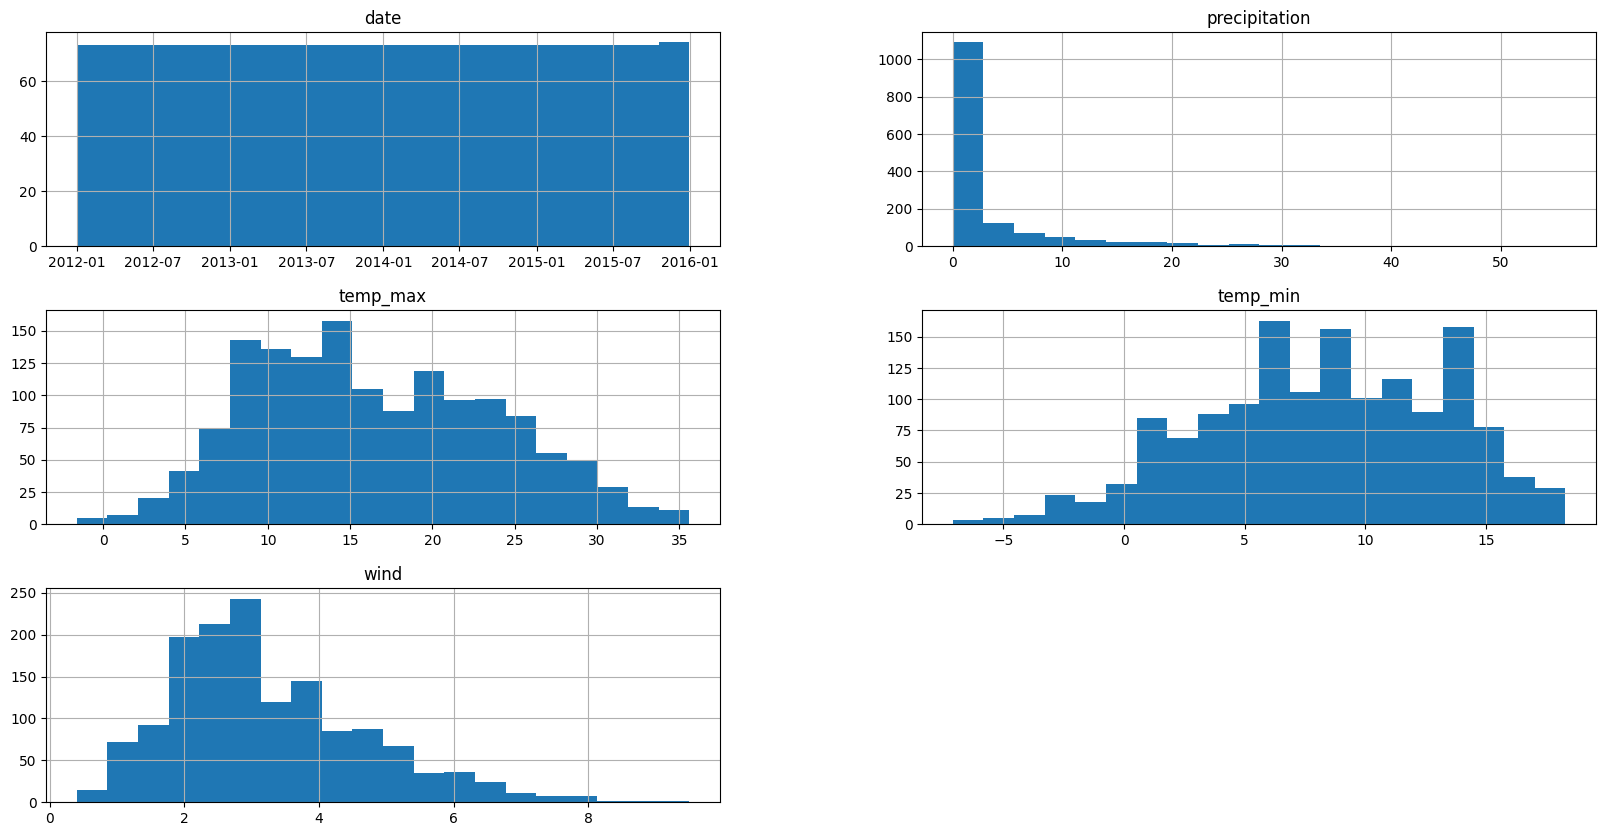

In [10]:
weather.hist(figsize=(20,10), bins=20)

## Football

In [11]:
football = pd.read_json("matches.json")
football

,date,team1,team2,score_team1,score_team2,group
0,2010-07-17,Kapfenberger SV,FC RB Salzburg,0,0,
1,2010-07-17,SC Wiener Neustadt,LASK Linz,5,0,
2,2010-07-17,SV Ried,SK Sturm Graz,0,3,
3,2010-07-18,FK Austria Wien,SV Mattersburg,2,0,
4,2010-07-18,FC Wacker Innsbruck,SK Rapid Wien,4,0,
...,...,...,...,...,...,...
34115,2018-05-18,Spezia,Parma,0,2,
34116,2018-05-18,Empoli,AC Perugia,2,1,
34117,2018-05-18,Venezia,Pescara,0,0,
34118,2018-05-18,Cittadella,Pro Vercelli,2,0,


In [93]:
TOP_K = 5

melted_df = pd.melt(football, id_vars=['date', 'team1', 'team2'], value_vars=['score_team1', 'score_team2'],
                    var_name='team_goal', value_name='goals')

# Combine team1 and team2 into a single column 'team'
melted_df['team'] = melted_df.apply(lambda row: row['team1'] if 'team1' in row['team_goal'] else row['team2'], axis=1)

# Calculate total goals for each team
total_goals = melted_df.groupby('team')['goals'].sum().reset_index()

# Select the top 20 scoring teams
top_k_teams = total_goals.nlargest(TOP_K, 'goals')['team']

# Filter the original DataFrame to include only matches involving the top 20 teams
filtered_df = melted_df[melted_df['team'].isin(top_k_teams)]

# Sort the DataFrame by date
filtered_df = filtered_df.sort_values(by=['date'])

# Calculate cumulative goals for each team
filtered_df['cumulative_goals'] = filtered_df.groupby('team')['goals'].cumsum()

melted_df

,date,team1,team2,team_goal,goals,team
0,2010-07-17,Kapfenberger SV,FC RB Salzburg,score_team1,0,Kapfenberger SV
1,2010-07-17,SC Wiener Neustadt,LASK Linz,score_team1,5,SC Wiener Neustadt
2,2010-07-17,SV Ried,SK Sturm Graz,score_team1,0,SV Ried
3,2010-07-18,FK Austria Wien,SV Mattersburg,score_team1,2,FK Austria Wien
4,2010-07-18,FC Wacker Innsbruck,SK Rapid Wien,score_team1,4,FC Wacker Innsbruck
...,...,...,...,...,...,...
68235,2018-05-18,Spezia,Parma,score_team2,2,Parma
68236,2018-05-18,Empoli,AC Perugia,score_team2,1,AC Perugia
68237,2018-05-18,Venezia,Pescara,score_team2,0,Pescara
68238,2018-05-18,Cittadella,Pro Vercelli,score_team2,0,Pro Vercelli


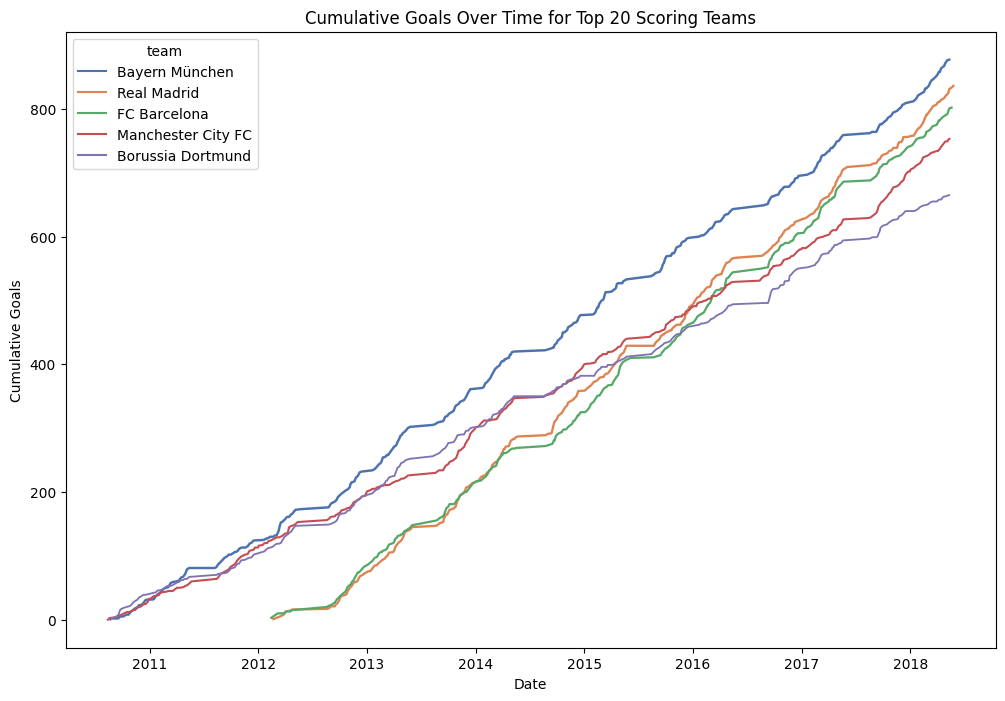

In [94]:
# Calculate total cumulative goals for each team
total_cumulative_goals = filtered_df.groupby('team')['cumulative_goals'].max().reset_index()

# Sort teams based on cumulative goals
sorted_teams = total_cumulative_goals.sort_values(by='cumulative_goals', ascending=False)['team']

# Create a Seaborn step plot with different line styles for each team
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='date', y='cumulative_goals', hue='team', palette="deep", style='team', markers=False, dashes=False, data=filtered_df, hue_order=sorted_teams)

# Set line thickness based on cumulative goals
for line, team in zip(ax.lines, sorted_teams):
    line.set_linewidth(total_cumulative_goals.loc[total_cumulative_goals['team'] == team, 'cumulative_goals'].values[0] / 500.0)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Goals')
plt.title('Cumulative Goals Over Time for Top 20 Scoring Teams')

# Display the plot
plt.show()

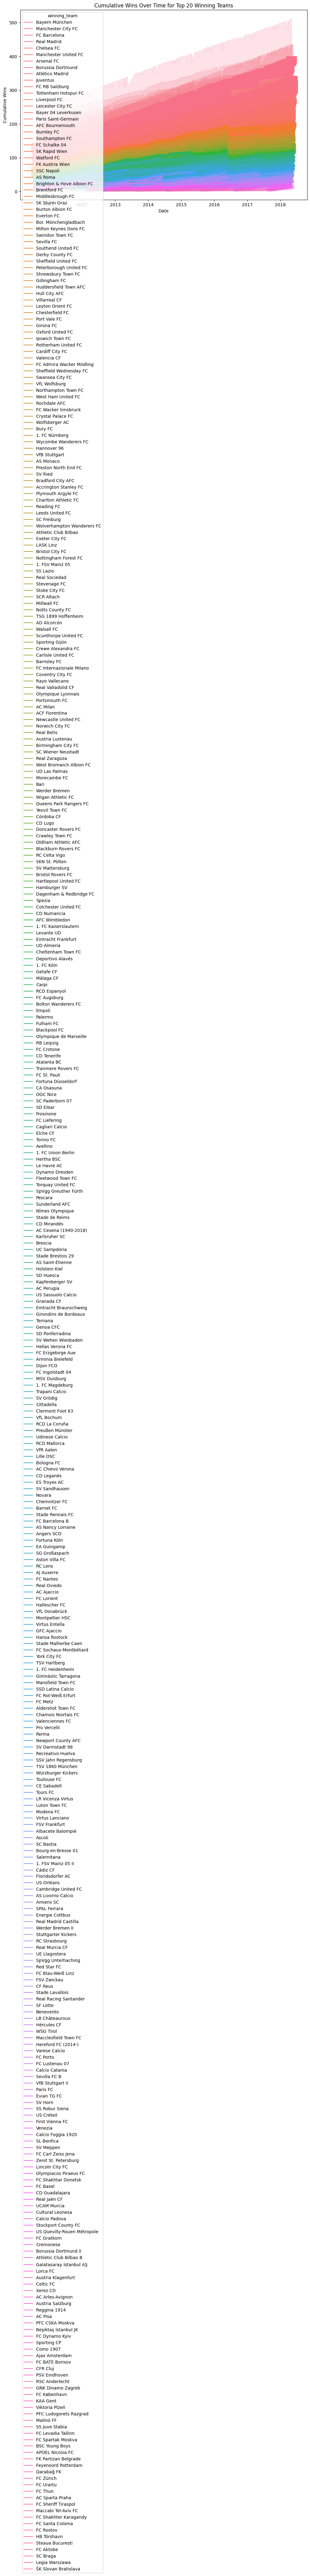

In [97]:
# Create a new column 'winning_team' based on the team with the maximum goals in each match
football['winning_team'] = football.apply(
    lambda row: row['team1'] if row['score_team1'] > row['score_team2'] else (row['team2'] if row['score_team2'] > row['score_team1'] else None), axis=1)

# Melt the DataFrame to have separate rows for each team's wins
melted_wins_df = pd.melt(football, id_vars=['date', 'winning_team'], value_vars=['score_team1', 'score_team2'],
                         var_name='team_goal', value_name='goals')

# Calculate cumulative wins for each team
melted_wins_df['cumulative_wins'] = melted_wins_df.groupby('winning_team').cumcount() + 1

# Sort teams based on cumulative wins
sorted_teams_wins = melted_wins_df.groupby('winning_team')['cumulative_wins'].max().sort_values(ascending=False).index

# Create a Seaborn lineplot with different line styles for each team
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='date', y='cumulative_wins', hue='winning_team', style='winning_team', markers=False, dashes=False, data=melted_wins_df, drawstyle='steps-post', hue_order=sorted_teams_wins)

# Set line thickness based on cumulative wins
for line, team in zip(ax.lines, sorted_teams_wins):
    line.set_linewidth(melted_wins_df.loc[melted_wins_df['winning_team'] == team, 'cumulative_wins'].max() / 20.0)  # You can adjust the divisor to control the line thickness

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Wins')
plt.title('Cumulative Wins Over Time for Top 20 Winning Teams')

# Display the plot
plt.show()